In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w):
    return tf.matmul(X, w) # notice we use the same model as linear regression, this is because there is a baked in cost function which performs softmax and cross entropy

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(10000, 784)


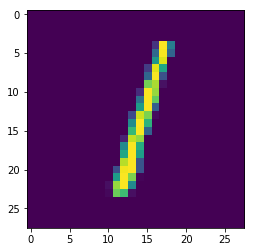

In [25]:
print(teX.shape)
index = 2
im = teX[index].reshape(28, 28)
plt.imshow(im)

(55000, 784)
range(0, 55000, 128)


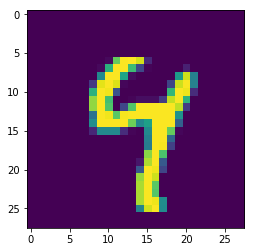

In [20]:
print(trX.shape)
print(range(0, len(trX), 128))
index = 2
im = trX[index].reshape(28, 28)
plt.imshow(im)

In [ ]:
print(help(tf.train.GradientDescentOptimizer))

In [21]:
X = tf.placeholder("float", [None, 784]) # create symbolic variables
Y = tf.placeholder("float", [None, 10])

w = init_weights([784, 10]) # like in linear regression, we need a shared variable weight matrix for logistic regression

py_x = model(X, w)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y)) # compute mean cross entropy (softmax is applied internally)
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct optimizer
predict_op = tf.argmax(py_x, 1) # at predict time, evaluate the argmax of the logistic regression

In [22]:
print(zip.__doc__)

zip(iter1 [,iter2 [...]]) --> zip object

Return a zip object whose .__next__() method returns a tuple where
the i-th element comes from the i-th iterable argument.  The .__next__()
method continues until the shortest iterable in the argument sequence
is exhausted and then it raises StopIteration.


In [ ]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        print(i, np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX})))